In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os

from scipy.signal import butter, filtfilt

### Usefull Functions

In [2]:

def get_file_names(directory):
    file_names = []
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            file_names.append(filename)
    return file_names

In [3]:

def plot_acceleration_velocity(data, title):
    time = pd.to_datetime(data['createdAt'])
    duration = data['params.duration'].values
    accel_x = data['params.accelRMS.x'].values
    accel_y = data['params.accelRMS.y'].values
    accel_z = data['params.accelRMS.z'].values
    vel_x = data['params.velRMS.x'].values
    vel_y = data['params.velRMS.y'].values
    vel_z = data['params.velRMS.z'].values

    end_time = time + pd.to_timedelta(duration, unit='s')

    fig, axs = plt.subplots(2, 3, figsize=(20, 8))
    labels = ['X', 'Y', 'Z']

    axs[0, 0].plot(time, accel_x)
    axs[0, 0].set_title('Acceleration (X)')
    axs[0, 0].set_xlabel('Time')
    axs[0, 0].set_ylabel('Acceleration')
    axs[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    axs[0, 1].plot(time, accel_y)
    axs[0, 1].set_title('Acceleration (Y)')
    axs[0, 1].set_xlabel('Time')
    axs[0, 1].set_ylabel('Acceleration')
    axs[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    axs[0, 2].plot(time, accel_z)
    axs[0, 2].set_title('Acceleration (Z)')
    axs[0, 2].set_xlabel('Time')
    axs[0, 2].set_ylabel('Acceleration')
    axs[0, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    axs[1, 0].plot(time, vel_x)
    axs[1, 0].set_title('Velocity (X)')
    axs[1, 0].set_xlabel('Time')
    axs[1, 0].set_ylabel('Velocity')
    axs[1, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    axs[1, 1].plot(time, vel_y)
    axs[1, 1].set_title('Velocity (Y)')
    axs[1, 1].set_xlabel('Time')
    axs[1, 1].set_ylabel('Velocity')
    axs[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    axs[1, 2].plot(time, vel_z)
    axs[1, 2].set_title('Velocity (Z)')
    axs[1, 2].set_xlabel('Time')
    axs[1, 2].set_ylabel('Velocity')
    axs[1, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    fig.suptitle(f'Sensor {sensor}:Acceleration and Velocity in the Time Domain')
    plt.tight_layout()
    plt.show()


In [4]:
import pandas as pd

def read_csv_file(path):
    """
    Reads a CSV file using pandas and returns a pandas DataFrame.

    Args:
        path (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: The DataFrame containing the data from the CSV file.
    """
    try:
        dataframe = pd.read_csv(path)
        return dataframe
    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
        return None


In [5]:


def convert_to_frequency_domain(df, interval):
    """
    Converts accelerometer data to the frequency domain for each axis (x, y, z).

    Args:
        df (pandas.DataFrame): The DataFrame containing accelerometer data for x, y, and z axes.
        interval (int): The duration interval between each measurement in milliseconds.

    Returns:
        pandas.DataFrame: The converted DataFrame with frequency domain data for each axis.
        numpy.array: The frequency array.
    """
    num_samples = len(df)

    for axis in ['x', 'y', 'z']:
        # Perform FFT
        accel_fft = np.fft.fft(df[axis])
        freq = np.fft.fftfreq(num_samples, interval / 1000)  # Convert interval from milliseconds to seconds

        # Add frequency domain data to the DataFrame
        df[f'{axis}_Frequency'] = np.abs(accel_fft)

    return df, freq

In [6]:
def plot_accelerometer_data(df, initial_time, interval, freq):
    """
    Plots accelerometer data in the time and frequency domains for each axis (x, y, z).

    Args:
        df (pandas.DataFrame): The DataFrame containing accelerometer data for x, y, and z axes.
        initial_time (int): The initial time of measurement in epoch Unix format.
        interval (int): The duration interval between each measurement in milliseconds.
        freq (numpy.array): The frequency array.
    """
    # Convert initial_time to datetime
    initial_datetime = pd.to_datetime(initial_time, unit='s')

    # Create time column based on initial time and interval
    num_samples = len(df)
    time = pd.date_range(start=initial_datetime, periods=num_samples, freq=f'{interval}ms')

    # Add time column to DataFrame
    df['Time'] = time

    # Create subplots for each axis
    fig, axes = plt.subplots(3, 2, figsize=(20, 10))

    for i, axis in enumerate(['x', 'y', 'z']):
        # Plot time domain data
        sns.lineplot(x='Time', y=axis, data=df, ax=axes[i, 0])
        axes[i, 0].set_title(f'{axis}-axis (Time Domain)')

        # Plot frequency domain data
        sns.lineplot(x=freq, y=df[f'{axis}_Frequency'], ax=axes[i, 1])
        axes[i, 1].set_title(f'{axis}-axis (Frequency Domain)')
        axes[i, 1].set_xlabel('Frequency (Hz)')

    fig.suptitle(f'Sensor {sensor}')
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

In [7]:
def plot_accelerometer_data_time(df, initial_time, interval):
    """
    Plots accelerometer data in the time domain for each axis (x, y, z).

    Args:
        df (pandas.DataFrame): The DataFrame containing accelerometer data for x, y, and z axes.
        initial_time (int): The initial time of measurement in epoch Unix format.
        interval (int): The duration interval between each measurement in milliseconds.
    """
    # Convert initial_time to datetime
    initial_datetime = pd.to_datetime(initial_time, unit='s')

    # Create time column based on initial time and interval
    num_samples = len(df)
    time = pd.date_range(start=initial_datetime, periods=num_samples, freq=f'{interval}ms')

    # Add time column to DataFrame
    df['Time'] = time

    # Create subplots for each axis
    fig, axes = plt.subplots(3, 1, figsize=(20, 10))

    for i, axis in enumerate(['x', 'y', 'z']):
        # Plot time domain data
        sns.lineplot(x='Time', y=axis, data=df, ax=axes[i])
        axes[i].set_title(f'{axis}-axis (Time Domain)')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

In [8]:
def apply_lowpass_filter(df, cutoff_freq, sample_freq):
    """
    Applies a low-pass filter to the accelerometer data.

    Args:
        df (pandas.DataFrame): The DataFrame containing accelerometer data for x, y, and z axes.
        cutoff_freq (float): The cutoff frequency for the low-pass filter.
        sample_freq (float): The sampling frequency of the accelerometer data.

    Returns:
        pandas.DataFrame: The DataFrame with filtered accelerometer data.
    """
    for axis in ['x', 'y', 'z']:
        # Get accelerometer data
        accel_data = df[axis].values

        # Apply Butterworth low-pass filter
        b, a = butter(4, cutoff_freq / (sample_freq / 2),   btype='lowpass',)
        filtered_data = filtfilt(b, a, accel_data)

        # Replace original data with filtered data
        df[axis] = filtered_data

    return df

In [ ]:
def calculate_uptime_downtime(df, ref_value,  threshold_percent):
    """
    Calculates the uptime and downtime of an asset based on the percentage difference between a value and the
    combined_acceleration column.

    Args:
        df (pandas.DataFrame): The DataFrame containing the relevant columns, including combined_acceleration.
        threshold_percent (float): The threshold percentage for classifying the asset as up or down.

    Returns:
        tuple: A tuple containing the uptime and downtime in milliseconds.
    """
    # Initialize variables
    uptime = 0
    downtime = 0
    is_up = False

    # Iterate over the combined_acceleration values and compare with the percentage difference
    for index, row in df.iterrows():
        percent_diff = np.abs((ref_value - row['combined_acceleration']) / row['combined_acceleration'] * 100)

        #print(percent_diff)
        if percent_diff > threshold_percent:
            if not is_up:
                is_up = True
                uptime += row['params.duration']
            else:
                uptime += row['params.duration']
        else:
            #print(row['params.duration'])
            if is_up:
                is_up = False
                downtime += row['params.duration']
            else:
                downtime += row['params.duration']

    return uptime, downtime

#

### Part 1

### Question 1 | Itens A and B

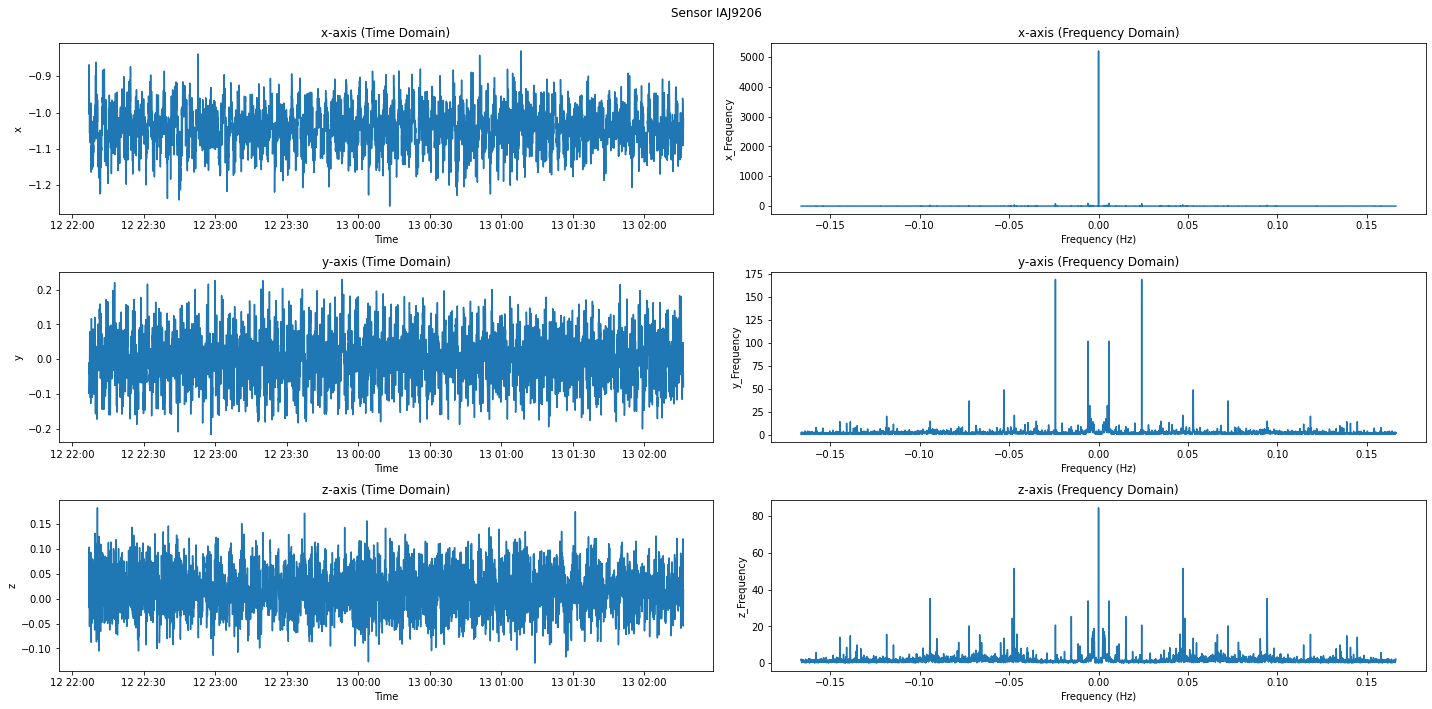

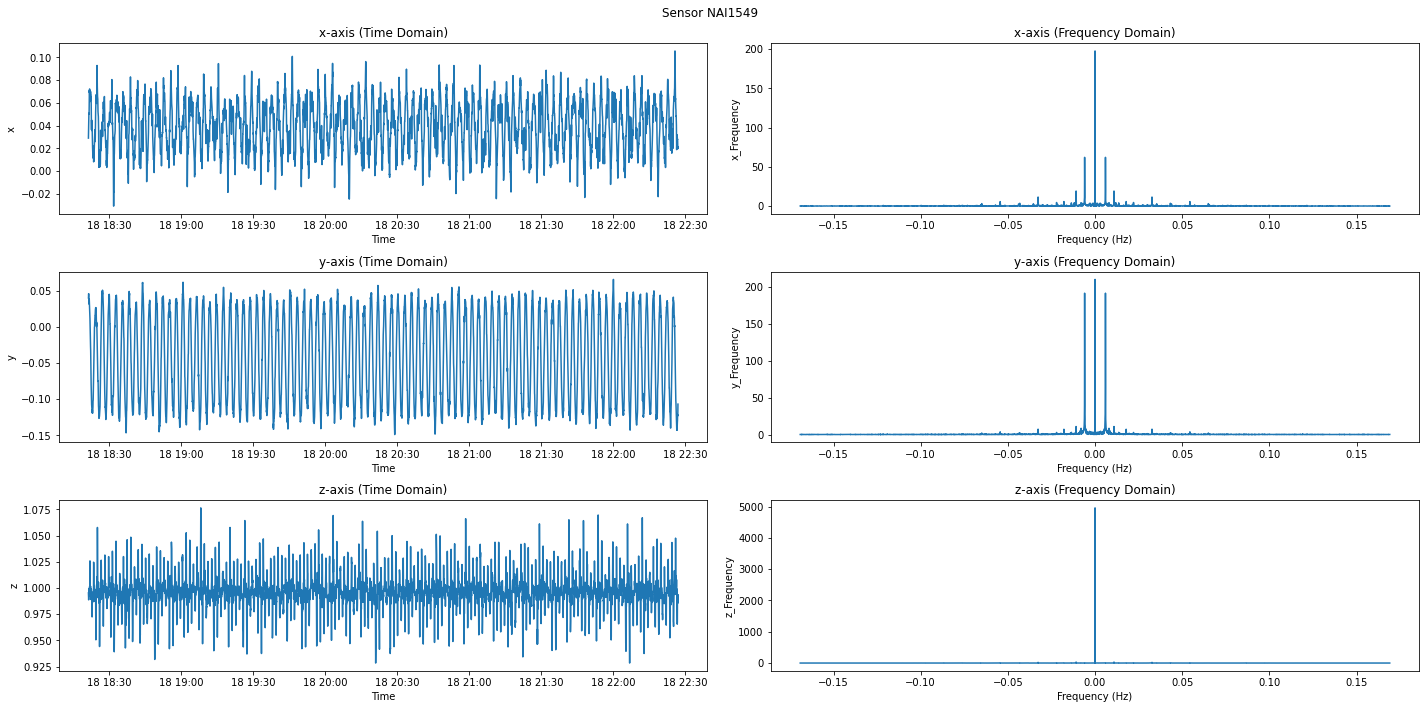

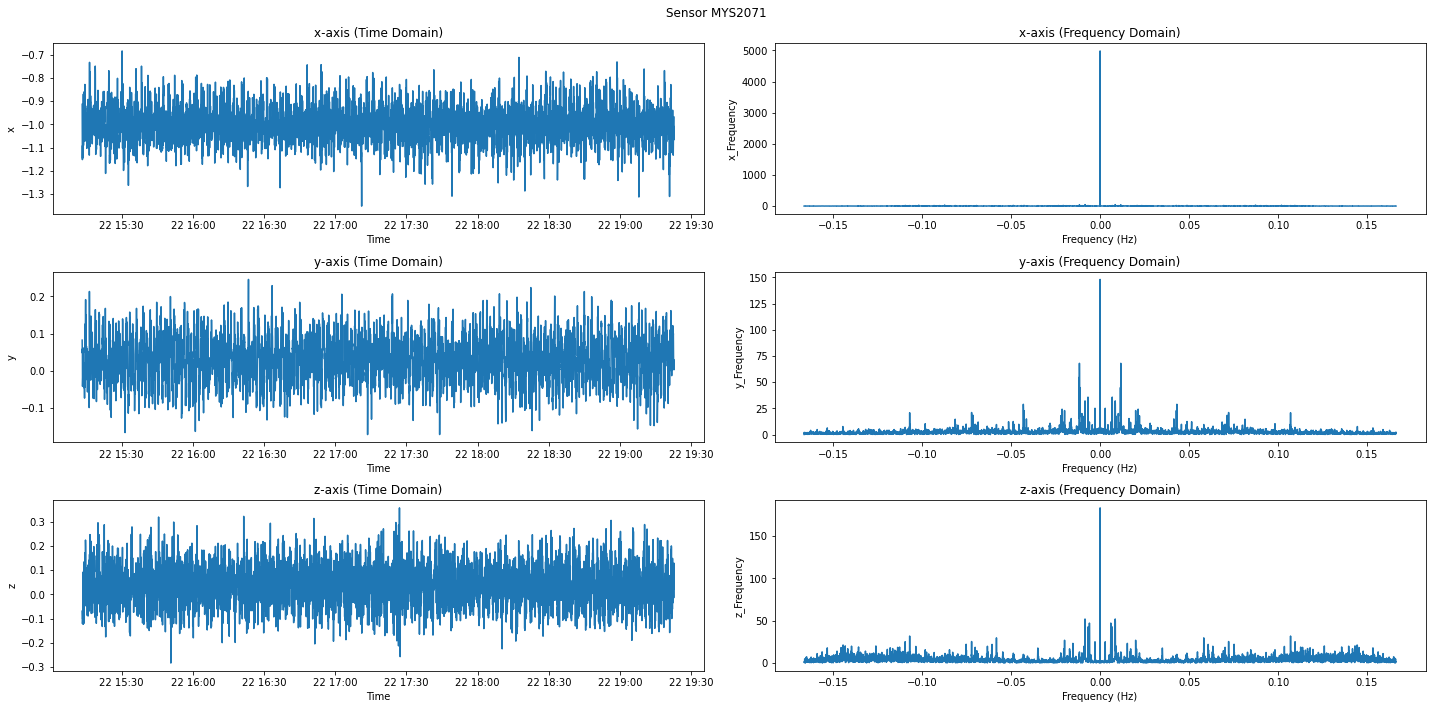

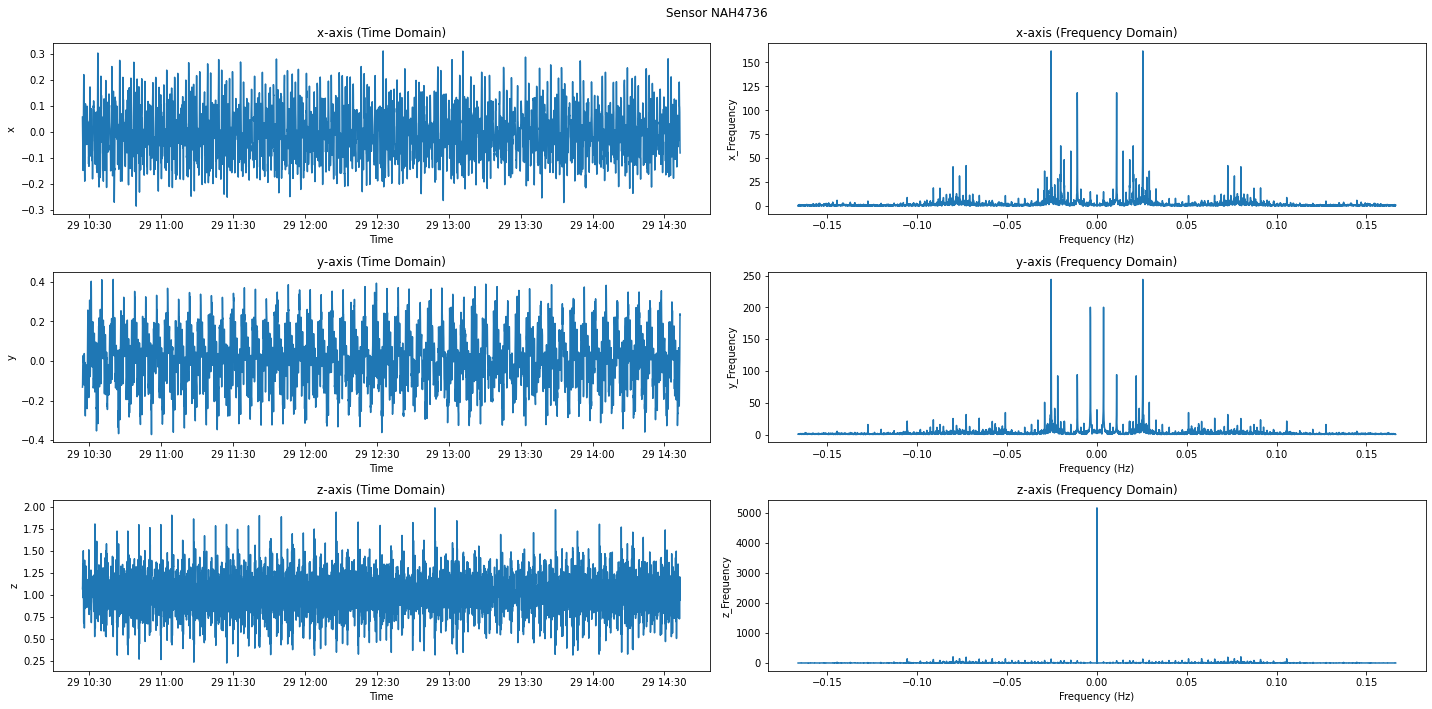

In [195]:
for file in files:
    df =  read_csv_file(data_path + file)

    # Specify the initial time and interval
    initial_time = int(file[:10]) # Initial time in epoch Unix format
    interval = int(file[11:15])   # Interval  between measurements in milliseconds
    sensor =  file[16:23]
    sample_freq = (1/interval)*1000
    cutoff_freq = 0.025

    # Convert to frequency domain
    data, freq = convert_to_frequency_domain(df, interval)
    # Plot accelerometer data
    plot_accelerometer_data(data, initial_time, interval, freq)


### Quetion 1 | Item C

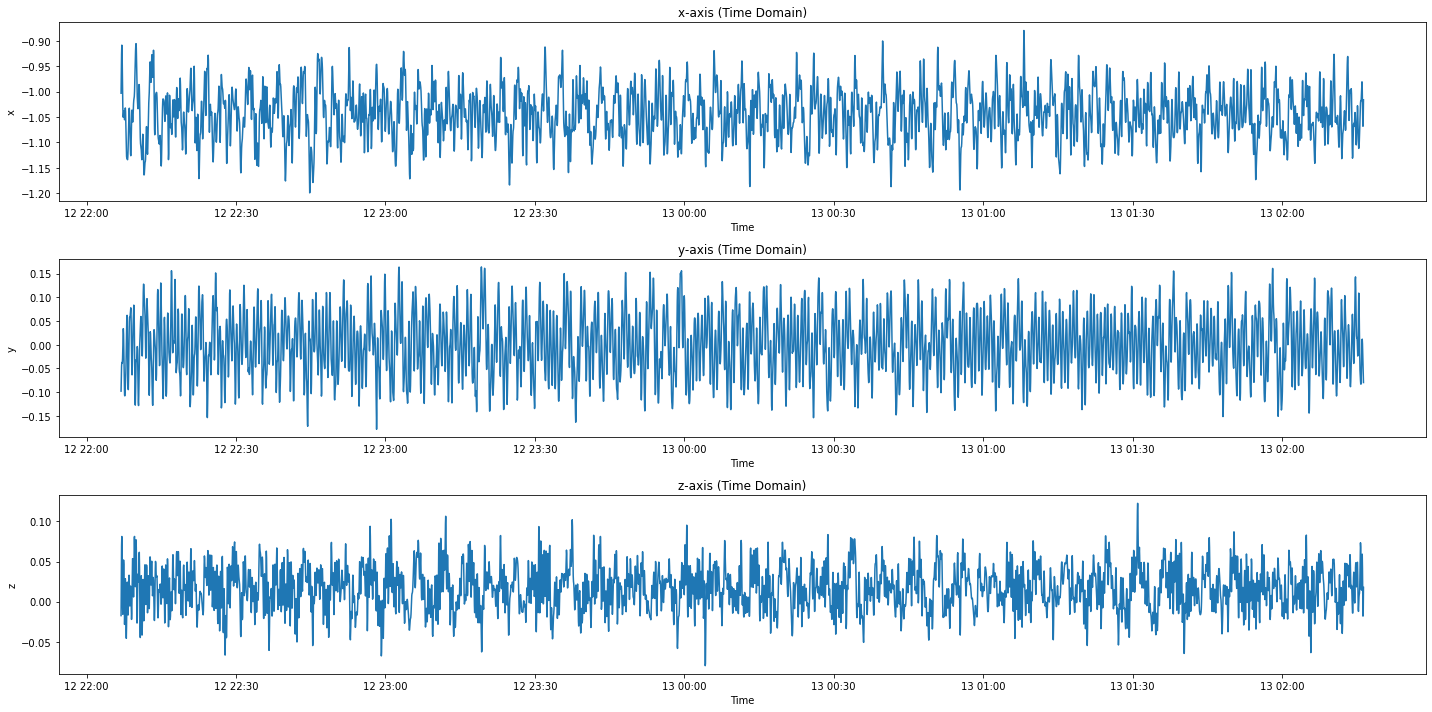

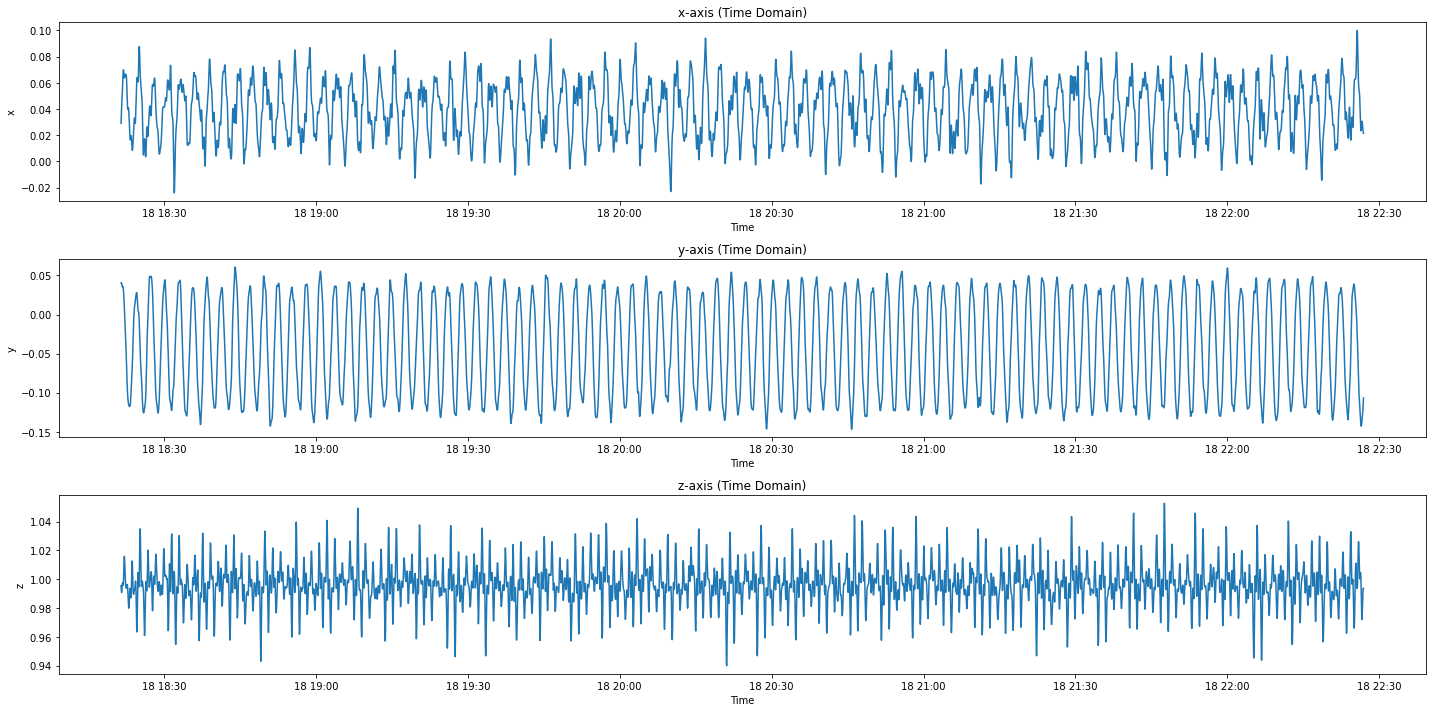

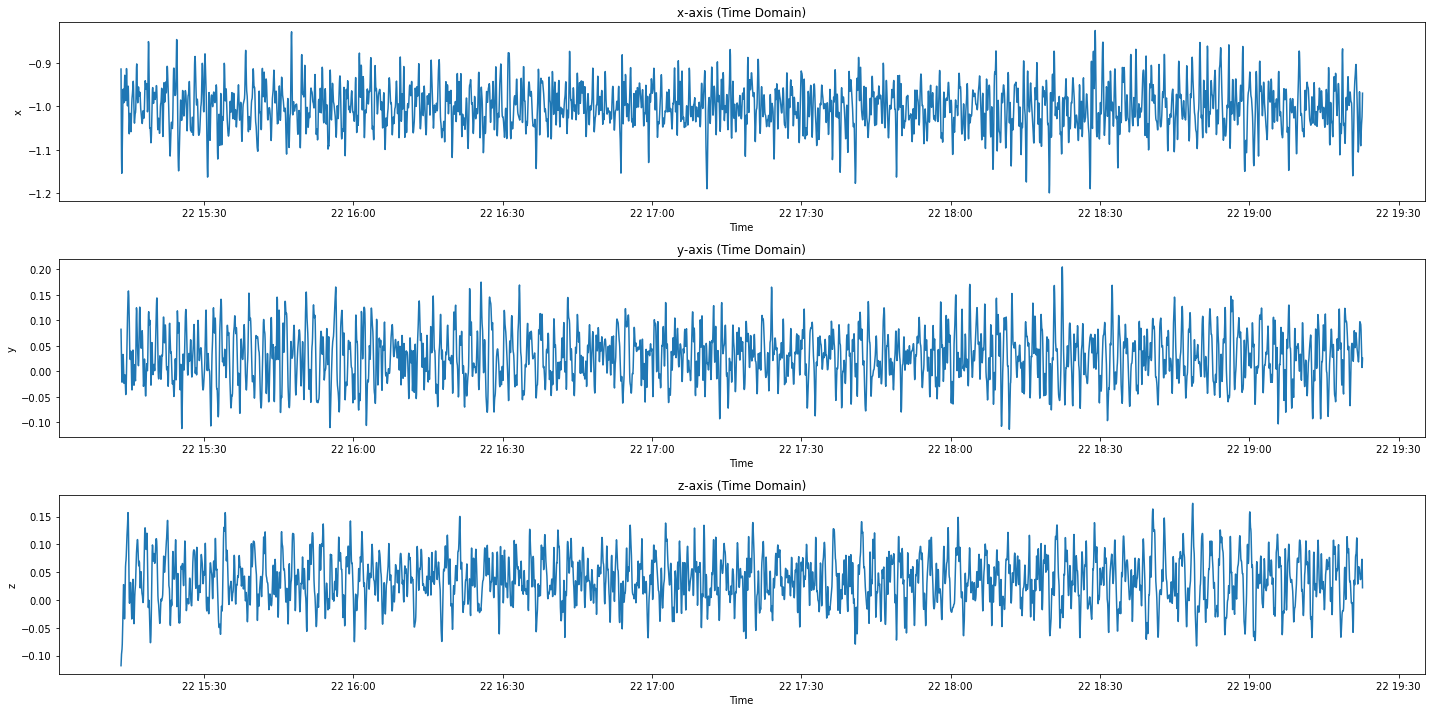

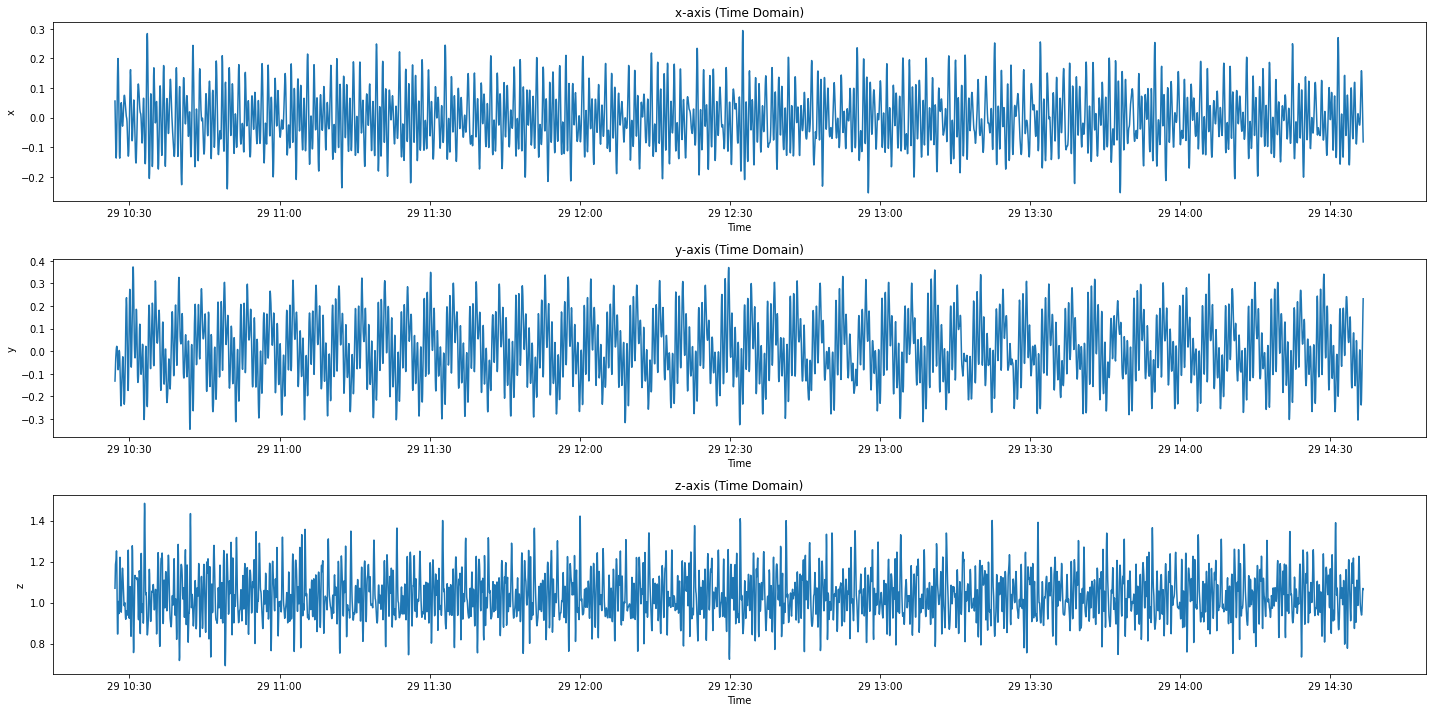

In [203]:

### For each graph we should use a different cutoff interval based on the previos graphs
for file in files:
    df =  read_csv_file(data_path + file)

    # Specify the initial time and interval
    initial_time = int(file[:10]) # Initial time in epoch Unix format
    interval = int(file[11:15])   # Interval  between measurements in milliseconds
    sensor =  file[16:23]
    sample_freq = (1/interval)*1000
    cutoff_freq = 0.05

    # Convert to frequency domain
    data, freq = convert_to_frequency_domain(df, interval)

    df_low = apply_lowpass_filter(data, cutoff_freq, sample_freq)

    plot_accelerometer_data_time(df_low, initial_time, interval)

###

### Part 2

In [96]:
data_path2 = 'data/part_2/'

In [98]:
df_collects = read_csv_file(data_path2 + 'collects.csv')
df_assets = read_csv_file(data_path2 + 'assets.csv')

df_assets.sensors = df_assets.sensors.apply(lambda x: re.sub(r'[\[\]""]', '', x))
df_collects.rename(columns = {'sensorId':'sensors'}, inplace = True)

### Question 2 | Item A

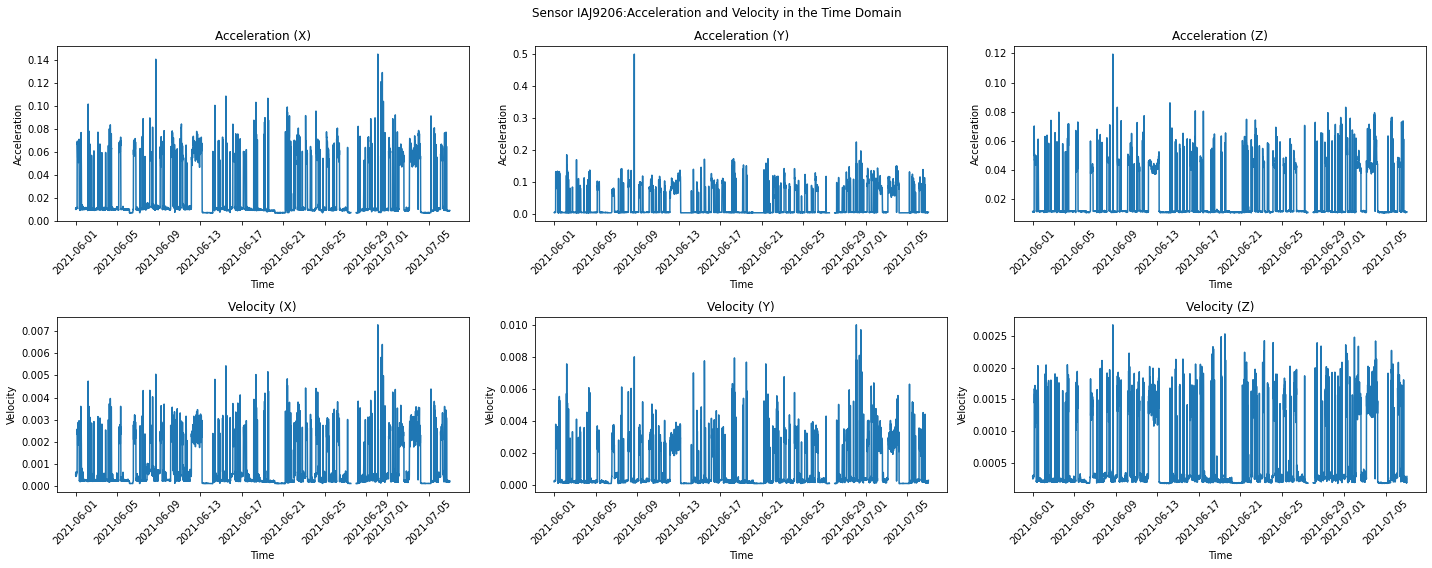

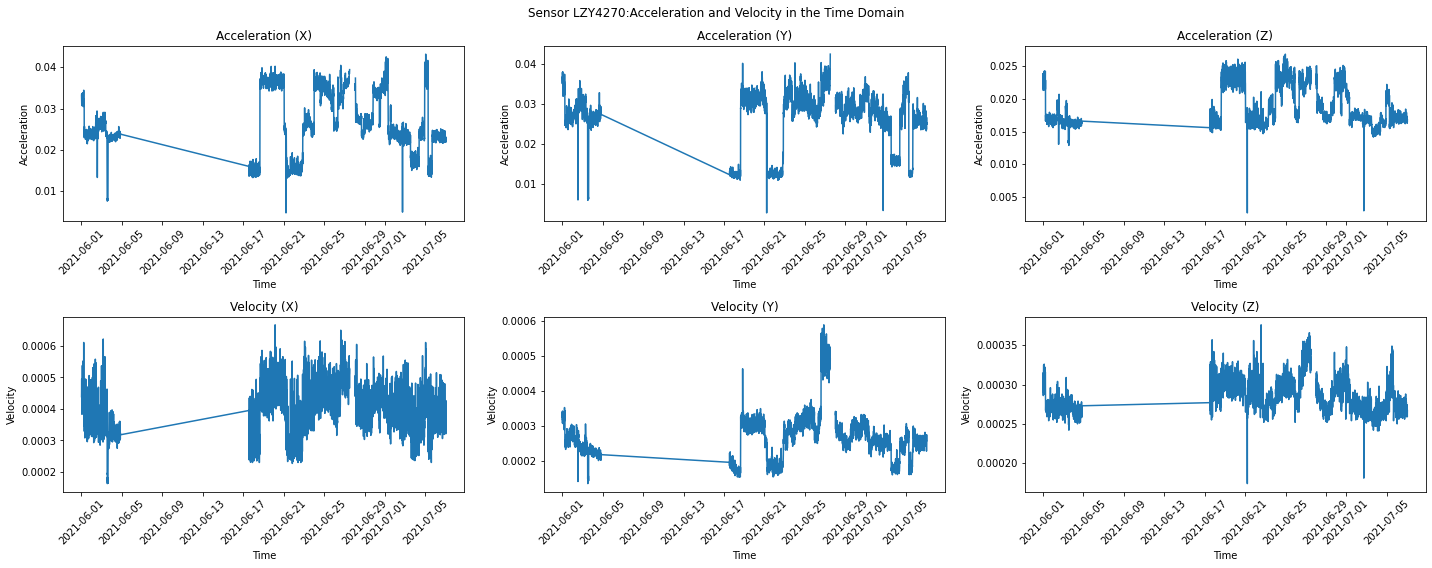

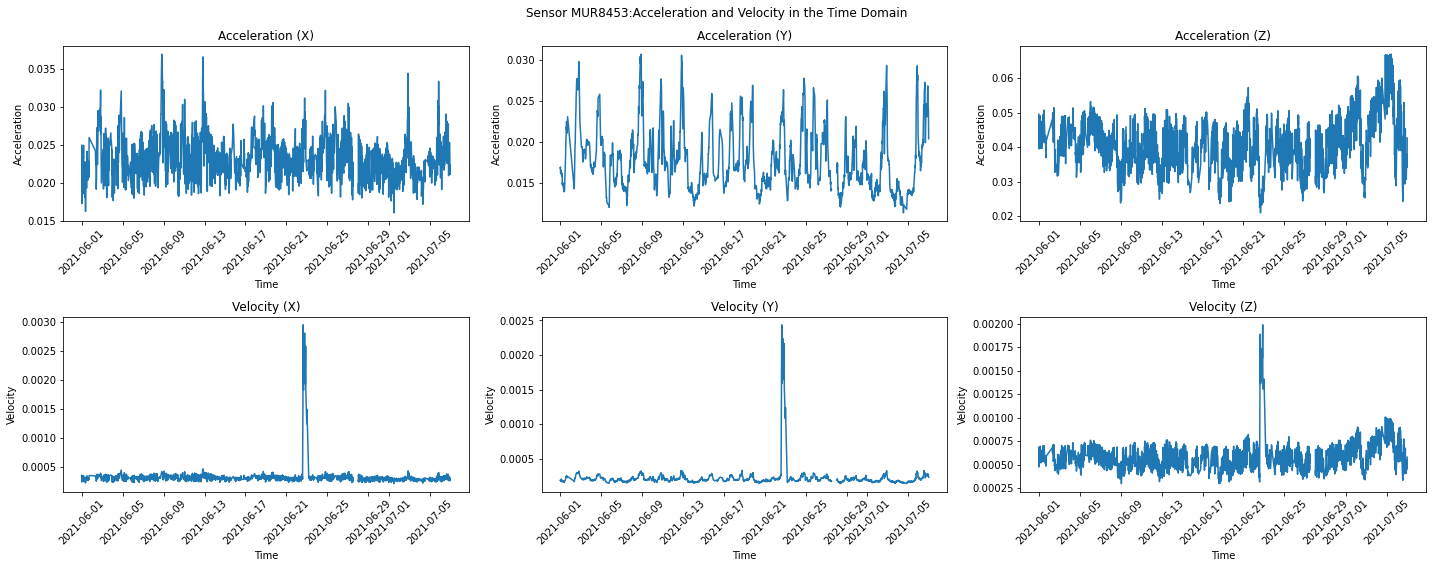

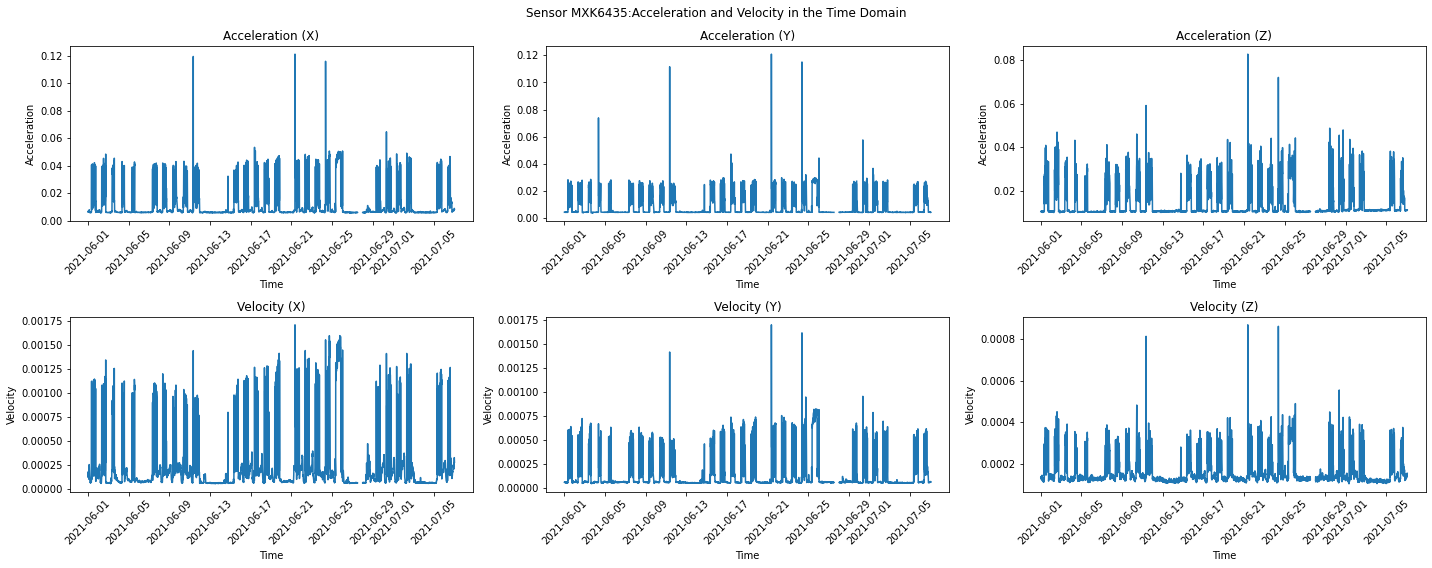

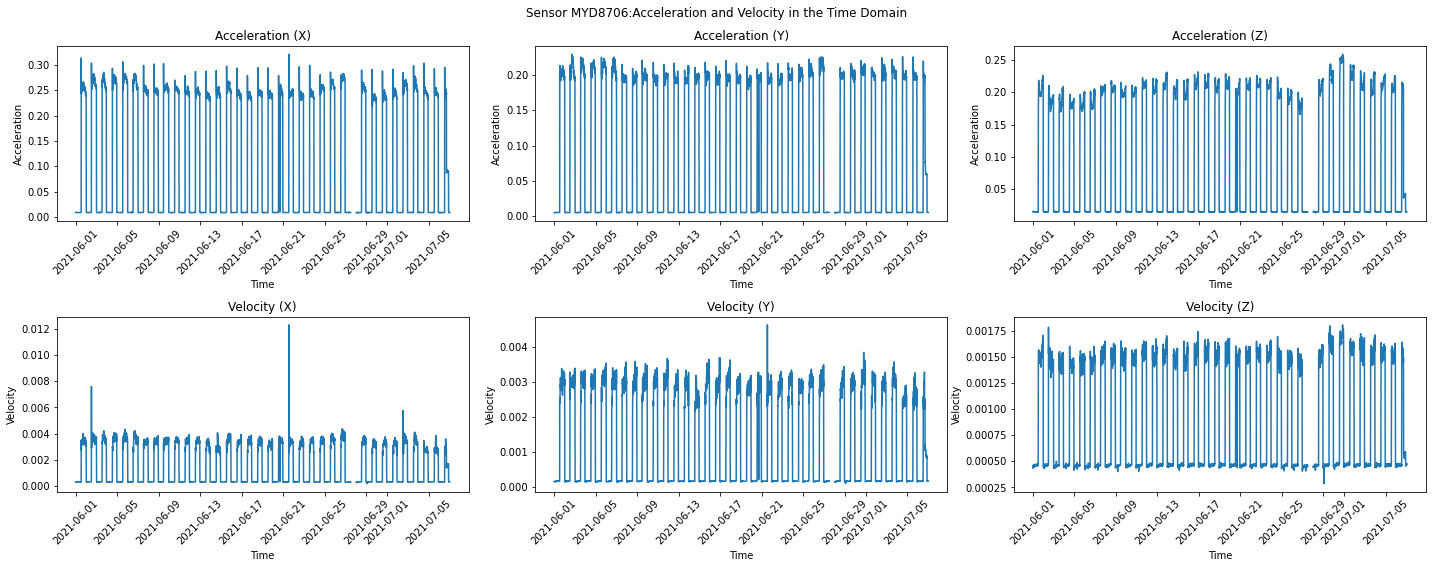

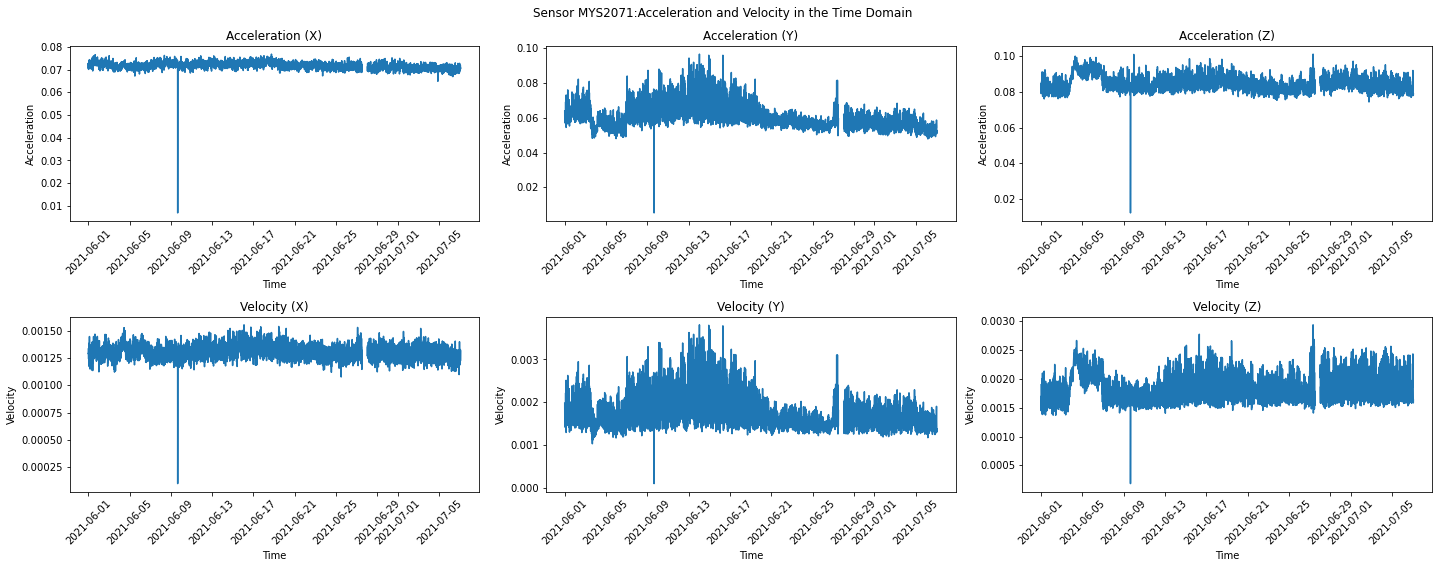

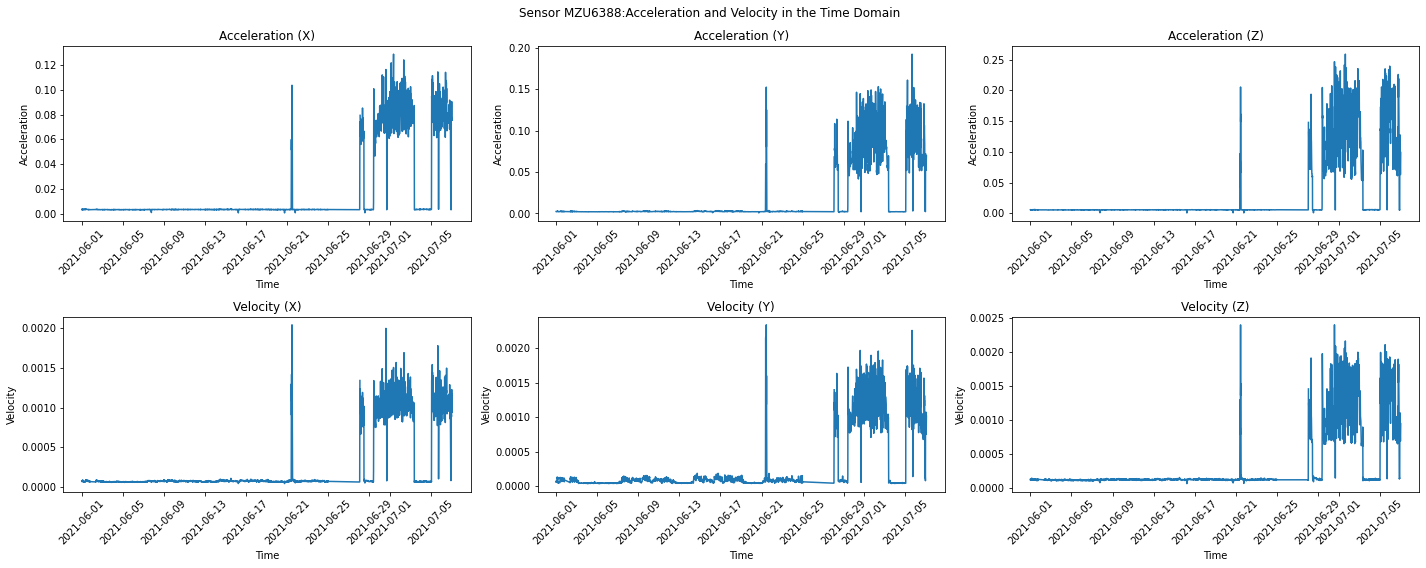

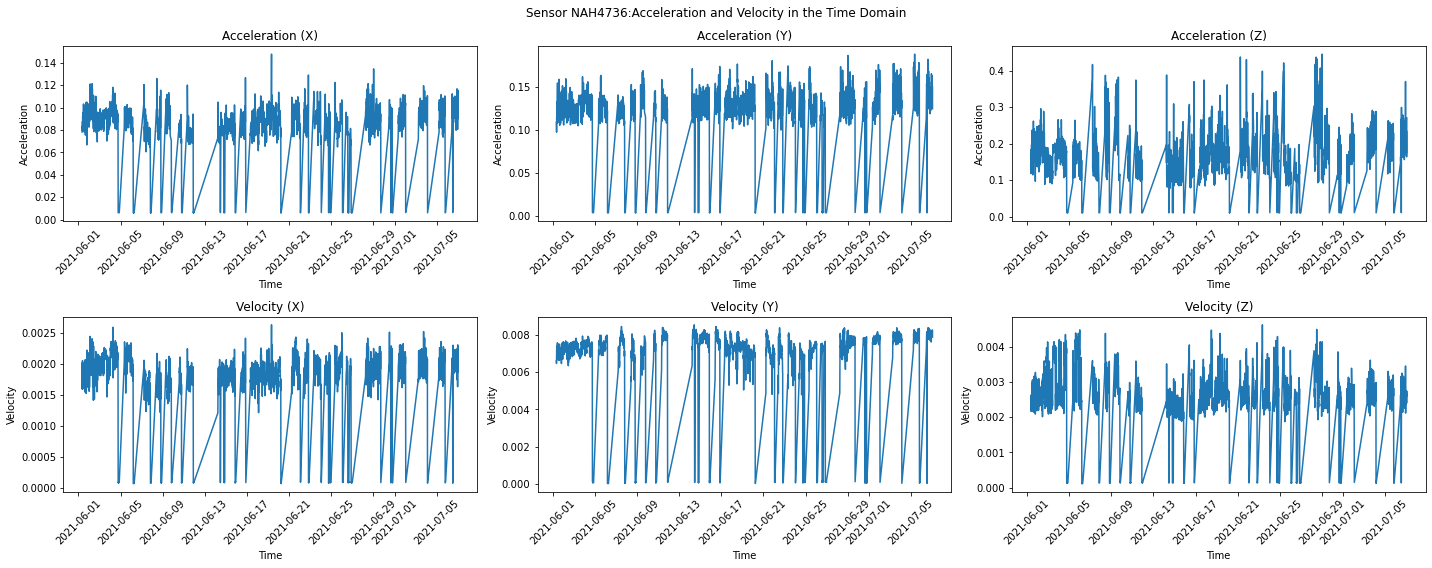

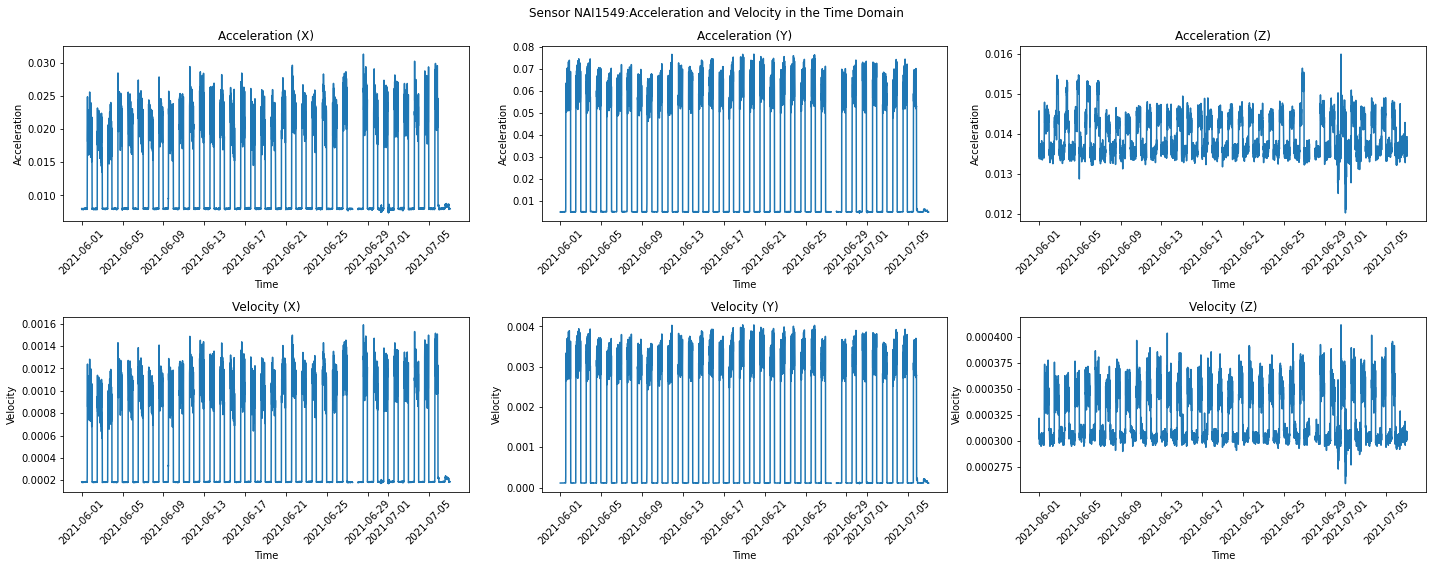

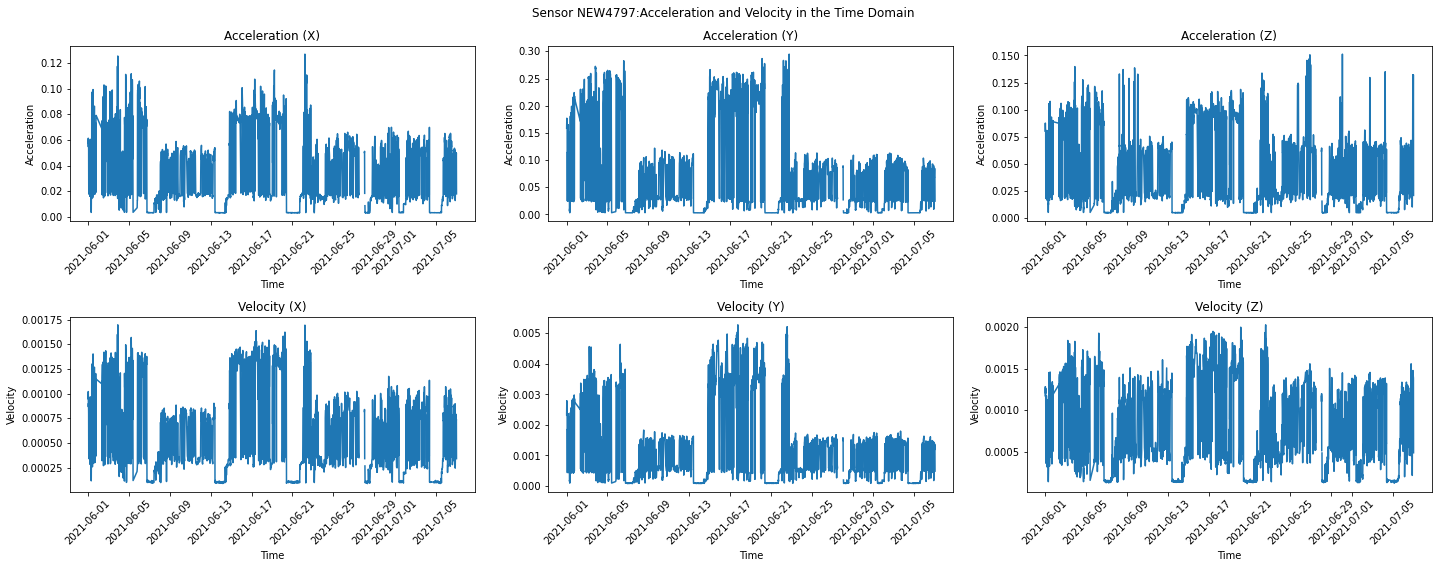

In [154]:
for sensor in df_collects.sensors.unique():
    df_collects.loc[df_collects.sensors == 'IAJ9206']
    plot_acceleration_velocity(df_collects.loc[df_collects.sensors == sensor], sensor)

In [16]:
# result_data = {}
# for sensor in df_collects.sensors.unique():
#     data = df_collects.loc[df_collects.sensors == sensor]

#     # Select the relevant columns for clustering
#     features = data.loc[:, ['params.accelRMS.x', 'params.accelRMS.y', 'params.accelRMS.z',
#                     'params.velRMS.x', 'params.velRMS.y', 'params.velRMS.z', 'temp']]

#     # Define the K-means model
#     k = 2
#     kmeans = KMeans(n_clusters=k, random_state=0)

#     # Fit the model to the data
#     kmeans.fit(features)

#     # Get the cluster labels
#     cluster_labels = kmeans.labels_

#     data['cluster'] = cluster_labels
#     # Add the cluster labels to the DataFrame
#     result_data[sensor] = data

In [180]:
result_data['IAJ9206'].cluster.value_counts()

1    2963
0     963
Name: cluster, dtype: int64

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_acceleration_clusters(data):
    time = pd.to_datetime(data['createdAt'])
    duration = data['params.duration'].values
    accel_x = data['params.accelRMS.x'].values
    accel_y = data['params.accelRMS.y'].values
    accel_z = data['params.accelRMS.z'].values
    cluster_labels = data['cluster'].values

    clusters = np.unique(cluster_labels)
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']

    for cluster in clusters:
        cluster_mask = (cluster_labels == cluster)
        cluster_time = time[cluster_mask]
        cluster_accel_x = accel_x[cluster_mask]
        cluster_accel_y = accel_y[cluster_mask]
        cluster_accel_z = accel_z[cluster_mask]

        fig, axs = plt.subplots(3, 1, figsize=(8, 12))

        axs[0].plot(cluster_time, cluster_accel_x, color=colors[cluster % len(colors)], label='X')
        axs[0].set_title('Cluster {} - Acceleration (X)'.format(cluster))
        axs[0].set_xlabel('Time')
        axs[0].set_ylabel('Acceleration')
        axs[0].tick_params(axis='x', rotation=45)
        axs[0].legend()

        axs[1].plot(cluster_time, cluster_accel_y, color=colors[cluster % len(colors)], label='Y')
        axs[1].set_title('Cluster {} - Acceleration (Y)'.format(cluster))
        axs[1].set_xlabel('Time')
        axs[1].set_ylabel('Acceleration')
        axs[1].tick_params(axis='x', rotation=45)
        axs[1].legend()

        axs[2].plot(cluster_time, cluster_accel_z, color=colors[cluster % len(colors)], label='Z')
        axs[2].set_title('Cluster {} - Acceleration (Z)'.format(cluster))
        axs[2].set_xlabel('Time')
        axs[2].set_ylabel('Acceleration')
        axs[2].tick_params(axis='x', rotation=45)
        axs[2].legend()

        plt.tight_layout()
        plt.show()


In [23]:
def combine_rms_acceleration(df):
    """
    Combines RMS acceleration values from x, y, and z axes into a single vector magnitude.

    Args:
        df (pandas.DataFrame): The DataFrame containing RMS acceleration values for x, y, and z axes.

    Returns:
        pandas.Series: A Series containing the combined vector magnitude values.
    """
    # Calculate the vector magnitude using the RMS acceleration values from each axis
    vector_magnitude = np.sqrt(df['params.accelRMS.z']**2 + df['params.accelRMS.y']**2 + df['params.accelRMS.z']**2)

    return vector_magnitude

In [24]:
df_collects

,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp
0,60b57955f77013684c413e39,2021-06-01T00:03:33.370Z,0.010463,0.004463,0.011677,3.006,1656.686627,1.622506e+09,0.000511,0.000176,0.000289,IAJ9206,23.94
1,60b57c53f77013684c41409f,2021-06-01T00:16:19.173Z,0.011437,0.004983,0.011482,3.006,1656.686627,1.622507e+09,0.000633,0.000238,0.000292,IAJ9206,23.19
2,60b57f34f77013684c4142cd,2021-06-01T00:28:36.553Z,0.010494,0.005024,0.011120,3.006,1656.686627,1.622507e+09,0.000524,0.000226,0.000246,IAJ9206,22.50
3,60b58237f77013684c41450c,2021-06-01T00:41:27.622Z,0.009859,0.004786,0.011096,3.006,1656.686627,1.622508e+09,0.000437,0.000220,0.000248,IAJ9206,22.87
4,60b58515f77013684c414765,2021-06-01T00:53:41.450Z,0.010014,0.005213,0.011332,3.006,1656.686627,1.622509e+09,0.000501,0.000251,0.000275,IAJ9206,22.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,60e4ee0b35645405b62ea2f5,2021-07-06T23:58:03.000Z,0.048851,0.080684,0.063319,2.710,1527.306273,1.625616e+09,0.000762,0.001369,0.001054,NEW4797,54.98
33897,60e4f20435645405b62ea5b4,2021-07-07T00:15:00.431Z,0.049630,0.084657,0.065195,2.710,1527.306273,1.625617e+09,0.000791,0.001380,0.001174,NEW4797,55.35
33898,60e4f62635645405b62ea8b5,2021-07-07T00:32:38.904Z,0.048705,0.069750,0.132227,2.712,1526.179941,1.625618e+09,0.000725,0.001206,0.001403,NEW4797,55.64
33899,60e4fa6035645405b62eabaf,2021-07-07T00:50:40.423Z,0.049600,0.068588,0.131735,2.711,1526.742899,1.625619e+09,0.000740,0.001337,0.001374,NEW4797,55.78


In [25]:
df_collects['combined_acceleration'] = combine_rms_acceleration(df_collects)

In [38]:
df_collects.loc[df_collects.sensorId == 'MXK6435'].combined_acceleration.describe()

count    3806.000000
mean        0.021944
std         0.012246
min         0.014577
25%         0.015419
50%         0.015767
75%         0.024805
max         0.168173
Name: combined_acceleration, dtype: float64

In [39]:
df_collects.loc[df_collects.sensorId == 'MXK6435'].combined_acceleration.quantile(0.25)

0.015418935979035864

<AxesSubplot:ylabel='Frequency'>

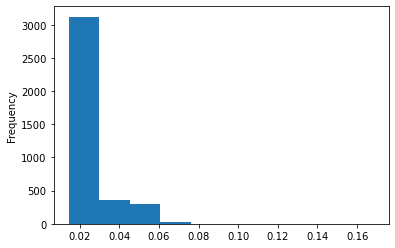

In [60]:
df_collects.loc[df_collects.sensors == 'MXK6435'].combined_acceleration.plot(kind = 'hist')

In [40]:
teste  = df_collects.loc[df_collects.sensorId == 'MXK6435']

In [41]:
teste['cluster'] =  teste.combined_acceleration.apply(lambda x: 1 if x > 0.015419 else 0)

<ipython-input-41-377212d99a40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['cluster'] =  teste.combined_acceleration.apply(lambda x: 1 if x > 0.015419 else 0)


In [31]:
df_collects.sensorId.unique()

array(['IAJ9206', 'LZY4270', 'MUR8453', 'MXK6435', 'MYD8706', 'MYS2071',
       'MZU6388', 'NAH4736', 'NAI1549', 'NEW4797'], dtype=object)

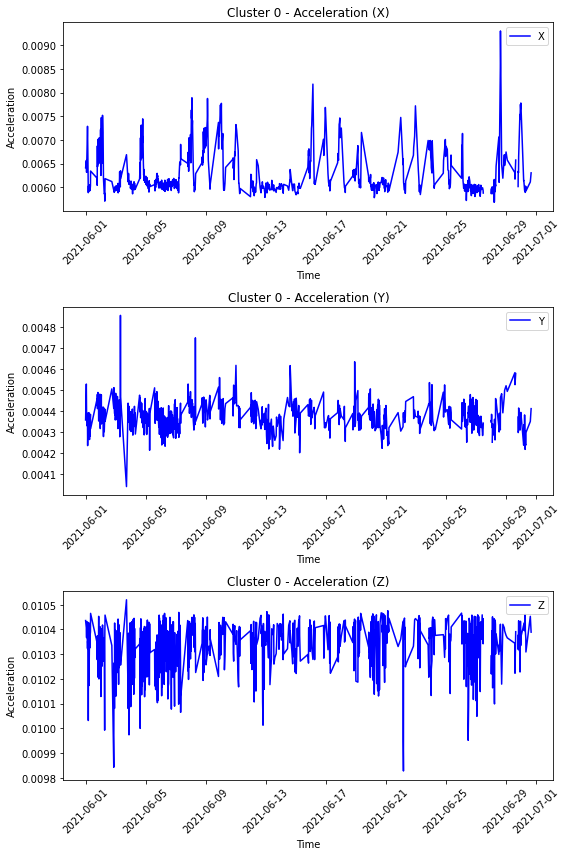

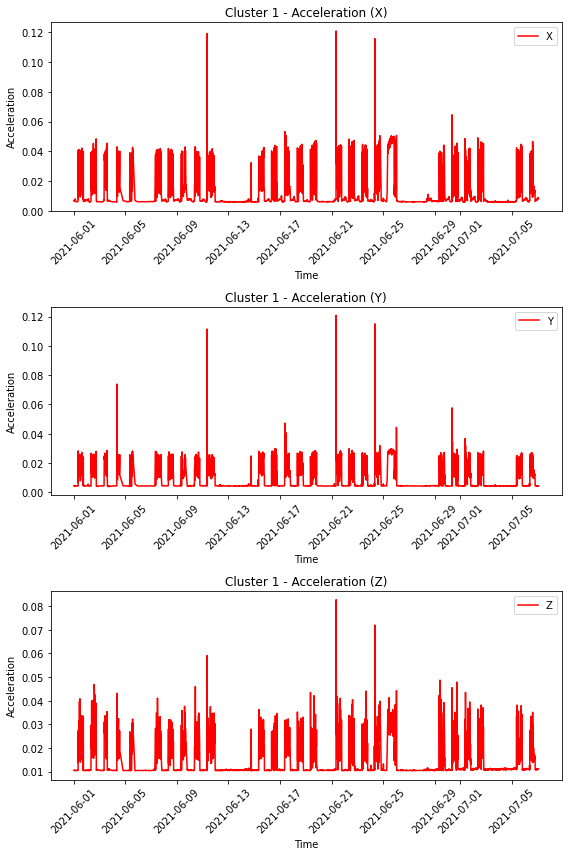

In [42]:
plot_acceleration_clusters(teste)

Index(['_id', 'createdAt', 'params.accelRMS.x', 'params.accelRMS.y',
       'params.accelRMS.z', 'params.duration', 'params.sampRate',
       'params.timeStart', 'params.velRMS.x', 'params.velRMS.y',
       'params.velRMS.z', 'sensorId', 'temp', 'combined_acceleration'],
      dtype='object')

### Item b

In [95]:

### Aqui estou considerando que uptime e downtime são o tempos em medições em ativos ligados ou desligados
### estou definindo o threshold de variação percentual em relação ao valor minimo de aceleração
### assumption: no valor minimo de aceleração o ativo está parado

threshold = 5
result_dict = {}
for sensor in df_collects.sensors.unique():
    df_temp = df_collects.loc[df_collects.sensors == sensor]
    ref_value = df_temp.combined_acceleration.min()

    #print(sensor)
    uptime, downtime = calculate_uptime_downtime(df_temp, ref_value, threshold)

    result_dict[sensor] = {'uptime':uptime, 'downtime':downtime}

pd.DataFrame(result_dict)

,IAJ9206,LZY4270,MUR8453,MXK6435,MYD8706,MYS2071,MZU6388,NAH4736,NAI1549,NEW4797
uptime,10112.193,9001.004,9561.812,9369.702,12659.597,14293.532,11152.855,6817.717,12644.521,5419.237
downtime,1689.397,4.001,14.242,2071.134,26.613,3.006,8.002,285.586,8.871,574.422
